In [5]:
import pandas as pd
df = pd.DataFrame({'Value': ['100','78','129'], 'Date': ['02/20/2015', '01/15/2016', '08/21/2015']})
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by=['Date'])


,Value,Date
0,100,2015-02-20
2,129,2015-08-21
1,78,2016-01-15


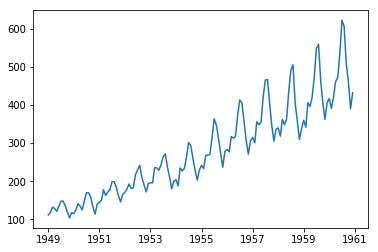

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Datasets/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
plt.plot(df['Month'], df['#Passengers'])
plt.show()

In [8]:
df = df.set_index(['Month'])

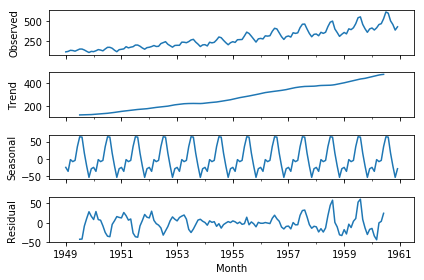

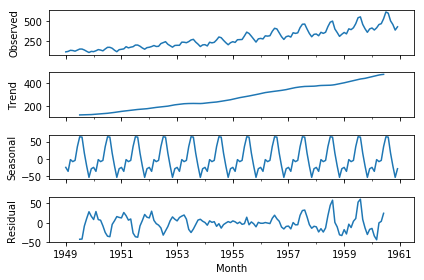

In [12]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
decomposition.plot()

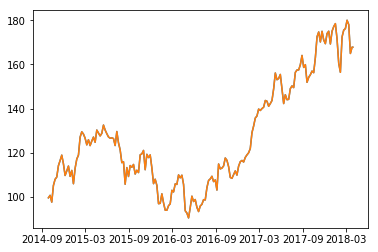

In [17]:
data = pd.read_csv("Datasets/AAPL.csv")
data['Date'] = pd.to_datetime(data['Date'])
data['Tick'] = range(0, len(data))
plt.plot(data['Date'], data['Close'])
plt.plot(data['Date'], data['Close'])
plt.show()

In [21]:
sample = data.sample(frac=0.5)

In [19]:
sample

,Date,Open,High,Low,Close,Adj Close,Volume,Tick
149,2017-08-07,157.059998,161.830002,154.630005,157.479996,155.667435,151269100,149


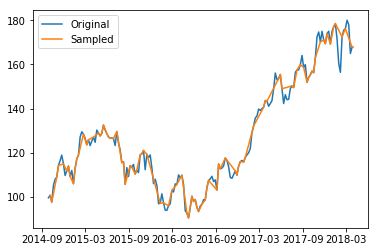

In [26]:
sample = sample.sort_values(by=['Date'])
plt.plot(data['Date'], data['Close'], label="Original")
plt.plot(sample['Date'], sample['Close'], label="Sampled")

## ? 
## data['Rolling_Mean'] = data["Close"].rolling(window=5).mean()

plt.legend()
plt.show()

In [29]:
df1 = pd.read_pickle('Datasets/apple_quandl.pkl')

In [30]:
df1.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [51]:
df_march = df1.loc["2017-03-01":"2017-03-31", ["Close"]]

In [52]:
df_march.mean()

Close    140.617826
dtype: float64

In [49]:
p0 = df_march[0]
pt = df_march[len(df_march["Close"])-1]

In [50]:
r = pt /p0 - 1

In [58]:
import numpy as np
df_march["log_price"] = np.log(df_march)
x = np.diff(df_march["log_price"])

In [59]:
print(df_march)
print(x.sum()*100)

             Close  log_price
Date                         
2017-03-01  139.79   4.940141
2017-03-02  138.96   4.934186
2017-03-03  139.78   4.940070
2017-03-06  139.34   4.936917
2017-03-07  139.52   4.938208
2017-03-08  139.00   4.934474
2017-03-09  138.68   4.932169
2017-03-10  139.14   4.935481
2017-03-13  139.20   4.935912
2017-03-14  138.99   4.934402
2017-03-15  140.46   4.944923
2017-03-16  140.69   4.946559
2017-03-17  139.99   4.941571
2017-03-20  141.46   4.952017
2017-03-21  139.84   4.940499
2017-03-22  141.42   4.951734
2017-03-23  140.92   4.948192
2017-03-24  140.64   4.946203
2017-03-27  140.88   4.947908
2017-03-28  143.80   4.968423
2017-03-29  144.12   4.970646
2017-03-30  143.93   4.969327
2017-03-31  143.66   4.967449
2.73081001636184


In [60]:
returns = df_march["Close"].pct_change()
print(returns.sum()*100)

2.784543213973867
